# **R Laboratory Session 02**
### *Course:* Advanced Statistics for Physics Analysis, University of Padua, A.Y. 2021/22
### *Student:* Daniele Ninni
***
## **Table of Contents**
1) [**Exercise 1**](#sec1)
2) [**Exercise 2**](#sec2)
    - [2.A](#sec2.A)
    - [2.B](#sec2.B)
    - [2.C](#sec2.C)
    - [2.D](#sec2.D)
3) [**Exercise 3**](#sec3)
4) [**Exercise 4**](#sec4)
5) [**Exercise 5**](#sec5)
    - [5.A](#sec5.A)
    - [5.B](#sec5.B)
    - [5.C](#sec5.C)
6) [**Exercise 6**](#sec6)
    - [6.A](#sec6.A)
    - [6.B](#sec6.B)
    - [6.C](#sec6.C)
***

In [1]:
# load packages
library(tidyverse)
library(GoFKernel) # to use: - 'Vectorize' (creates a function wrapper that vectorizes the action of a scalar function)
                   #         - 'inverse'   (calculates the inverse function of a CDF)

# set plot options (global)
theme_set(theme_bw(base_size=8))
options(
    repr.plot.width=7,  # plotting area width in inches  (default:   7)
    repr.plot.height=4, # plotting area height in inches (default:   7)
    repr.plot.res=300   # PPI for rasterization          (default: 120)
)

# set random seed for reproducibility
set.seed(10)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Caricamento del pacchetto richiesto: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



<a id='sec1'></a>
## **Exercise 1**

A set of measurements have been performed on the concentration of a contaminant in tap water. The following table reports a set of values ($x$), with the corresponding probabilities given by the two methods ($p_1$ and $p_2$).

| $x$ | 15.58 | 15.9 | 16 | 16.1 | 16.2 |
| :-: | :-: | :-: | :-: | :-: | :-: |
| $p_1$ | 0.15 | 0.21 | 0.35 | 0.15 | 0.14 |
| $p_2$ | 0.14 | 0.05 | 0.64 | 0.08 | 0.09 |

- ### Evaluate the expected value, $E[x]$, and the variance, $Var(x)$, for both methods

In [2]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

cat('------ METHOD #1 ------')
cat('\nExpected value:', round(sum(x*p1), 3))
cat('\nVariance:       ', round(sum((x^2)*p1)-(sum(x*p1))^2, 3))
cat('\n-----------------------')

cat('\n\n------ METHOD #2 ------')
cat('\nExpected value:', round(sum(x*p2), 3))
cat('\nVariance:       ', round(sum((x^2)*p2)-(sum(x*p2))^2, 3))
cat('\n-----------------------')

------ METHOD #1 ------
Expected value: 15.959
Variance:        0.034
-----------------------

------ METHOD #2 ------
Expected value: 15.962
Variance:        0.028
-----------------------

<a id='sec2'></a>
## **Exercise 2**

The waiting time, in minutes, at the doctor's is about 30 minutes and the distribution follows an exponential PDF with rate $1/30$.

<a id='sec2.A'></a>
### **2.A** Simulate the waiting time for 50 people at the doctor's office and plot the relative histogram

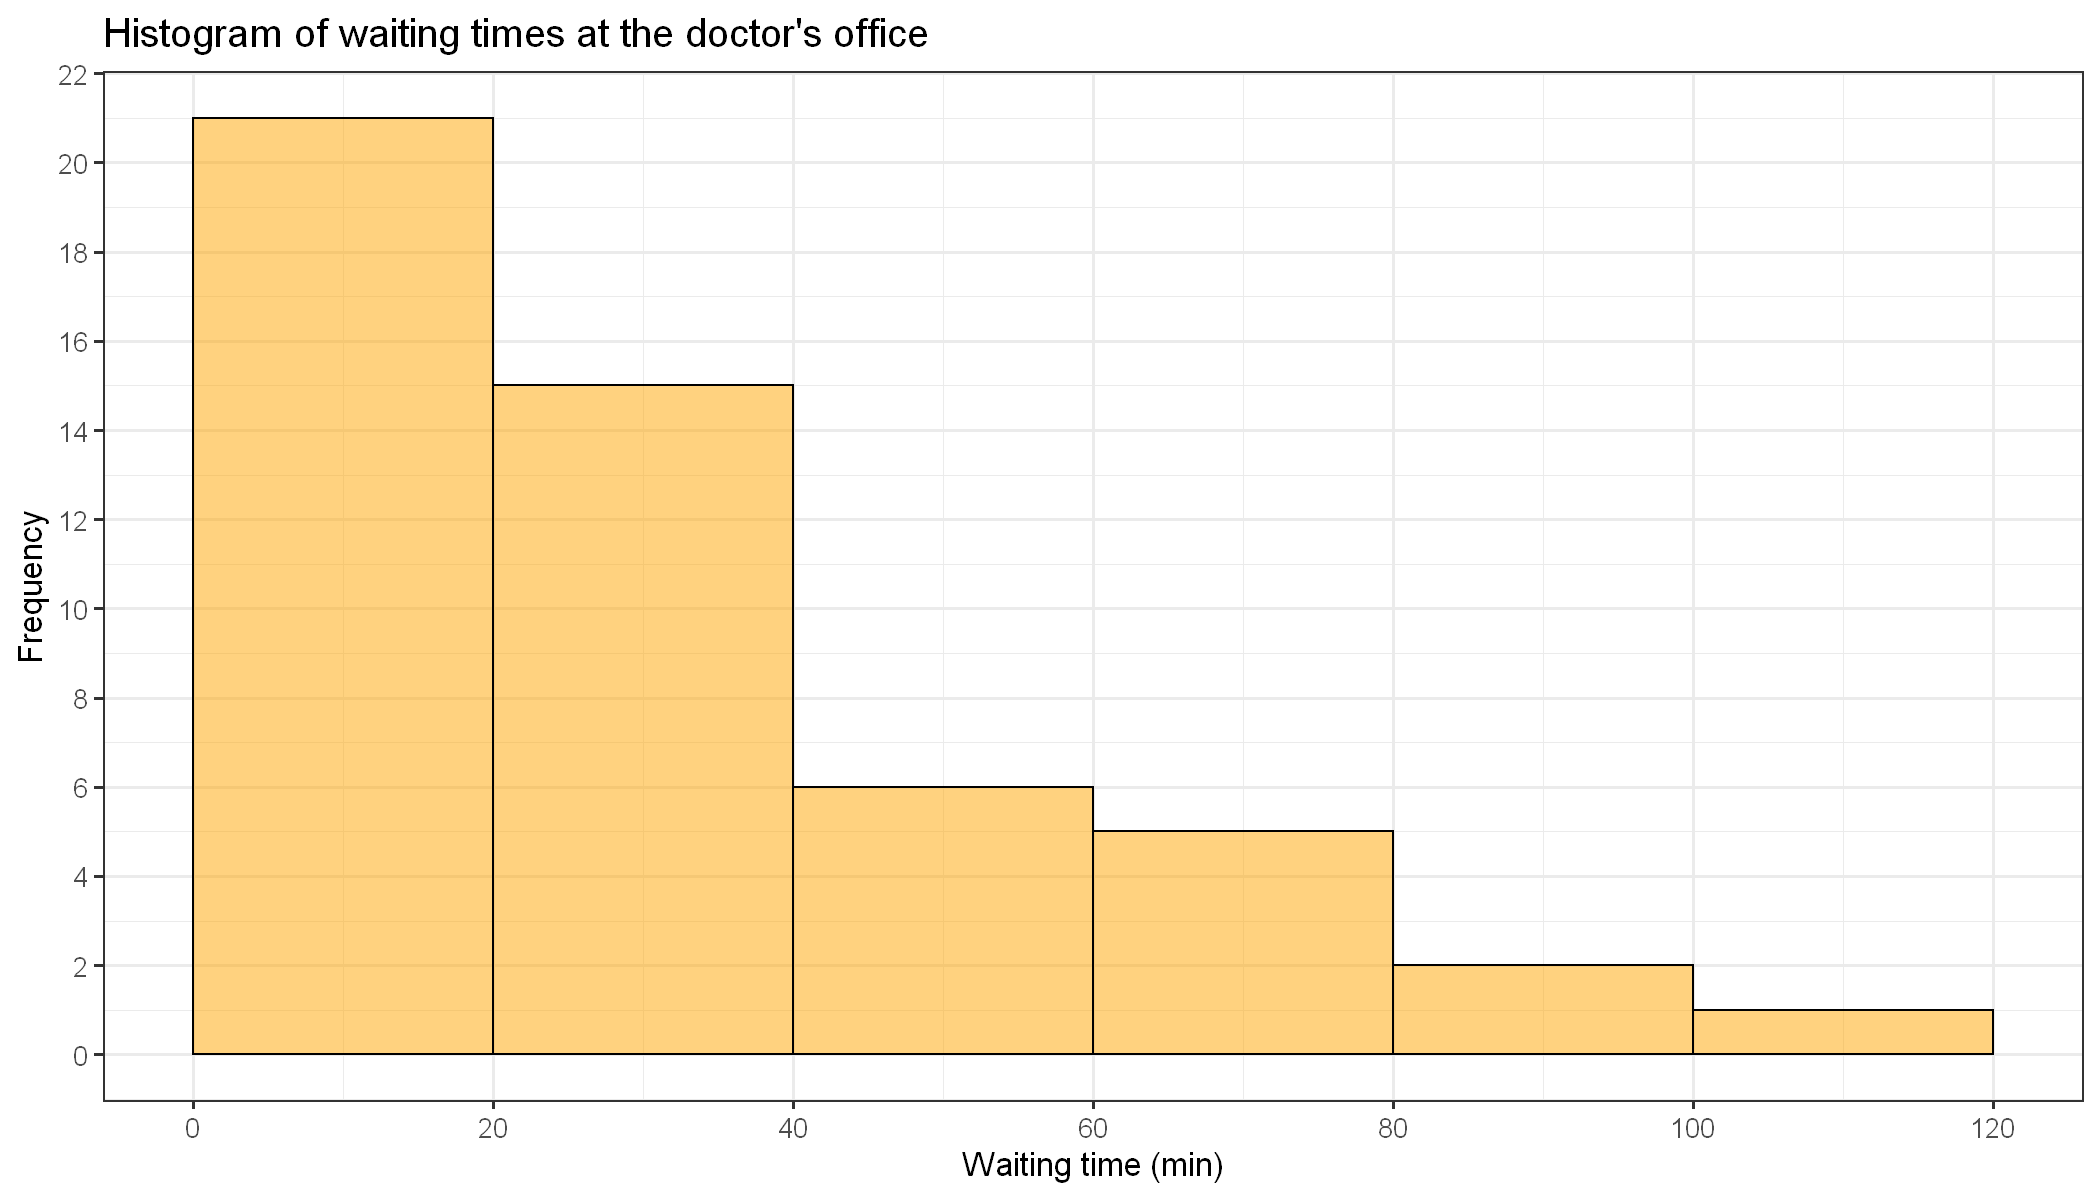

In [3]:
lambda <- 1/30 # rate

N <- 50 # number of people
waiting_times <- rexp(N, rate=lambda)

ggplot() +
    geom_histogram(aes(x=waiting_times), alpha=.5, colour='black', fill='orange', size=.3, binwidth=20, boundary=0) +
    scale_x_continuous(n.breaks=7) +
    scale_y_continuous(n.breaks=12) +
    xlab('Waiting time (min)') +
    ylab('Frequency') +
    ggtitle("Histogram of waiting times at the doctor's office")

<a id='sec2.B'></a>
### **2.B** What is the probability that a person will wait for less than 10 minutes?

In [4]:
cat('Probability that a person will wait for less than 10 minutes:', round(100*pexp(10, rate=lambda), 2), '%')

Probability that a person will wait for less than 10 minutes: 28.35 %

<a id='sec2.C'></a>
### **2.C** Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distribution using R)

In [5]:
cat('AVERAGE WAITING TIME (min)')
cat('\n- from simulated data:   ', round(mean(waiting_times), 2))
cat('\n- from theory:           ', 1/lambda)
for (N in seq(100, 500, 50)) {
    x <- seq(0, N)
    p <- dexp(x, rate=lambda)
    cat(paste('\n- as sum(x*p(x)) [N=', N, ']: ', round(sum(x*p), 2), sep=''))
}

AVERAGE WAITING TIME (min)
- from simulated data:    29.94
- from theory:            30
- as sum(x*p(x)) [N=100]: 25.42
- as sum(x*p(x)) [N=150]: 28.8
- as sum(x*p(x)) [N=200]: 29.71
- as sum(x*p(x)) [N=250]: 29.93
- as sum(x*p(x)) [N=300]: 29.98
- as sum(x*p(x)) [N=350]: 29.99
- as sum(x*p(x)) [N=400]: 30
- as sum(x*p(x)) [N=450]: 30
- as sum(x*p(x)) [N=500]: 30

<a id='sec2.D'></a>
### **2.D** What is the probability for waiting more than one hour before being received?

In [6]:
cat('Probability for waiting more than one hour before being received:', round(100*(1-pexp(60, rate=lambda)), 2), '%')

Probability for waiting more than one hour before being received: 13.53 %

<a id='sec3'></a>
## **Exercise 3**

Let's suppose that on a book, on average, there is one typo error every three pages.

- ### If the number of errors follows a Poisson distribution, plot the PDF and CDF, and calculate the probability that there is at least one error on a specific page of the book

Probability that there is at least one error on a specific page of the book: 28.35 %

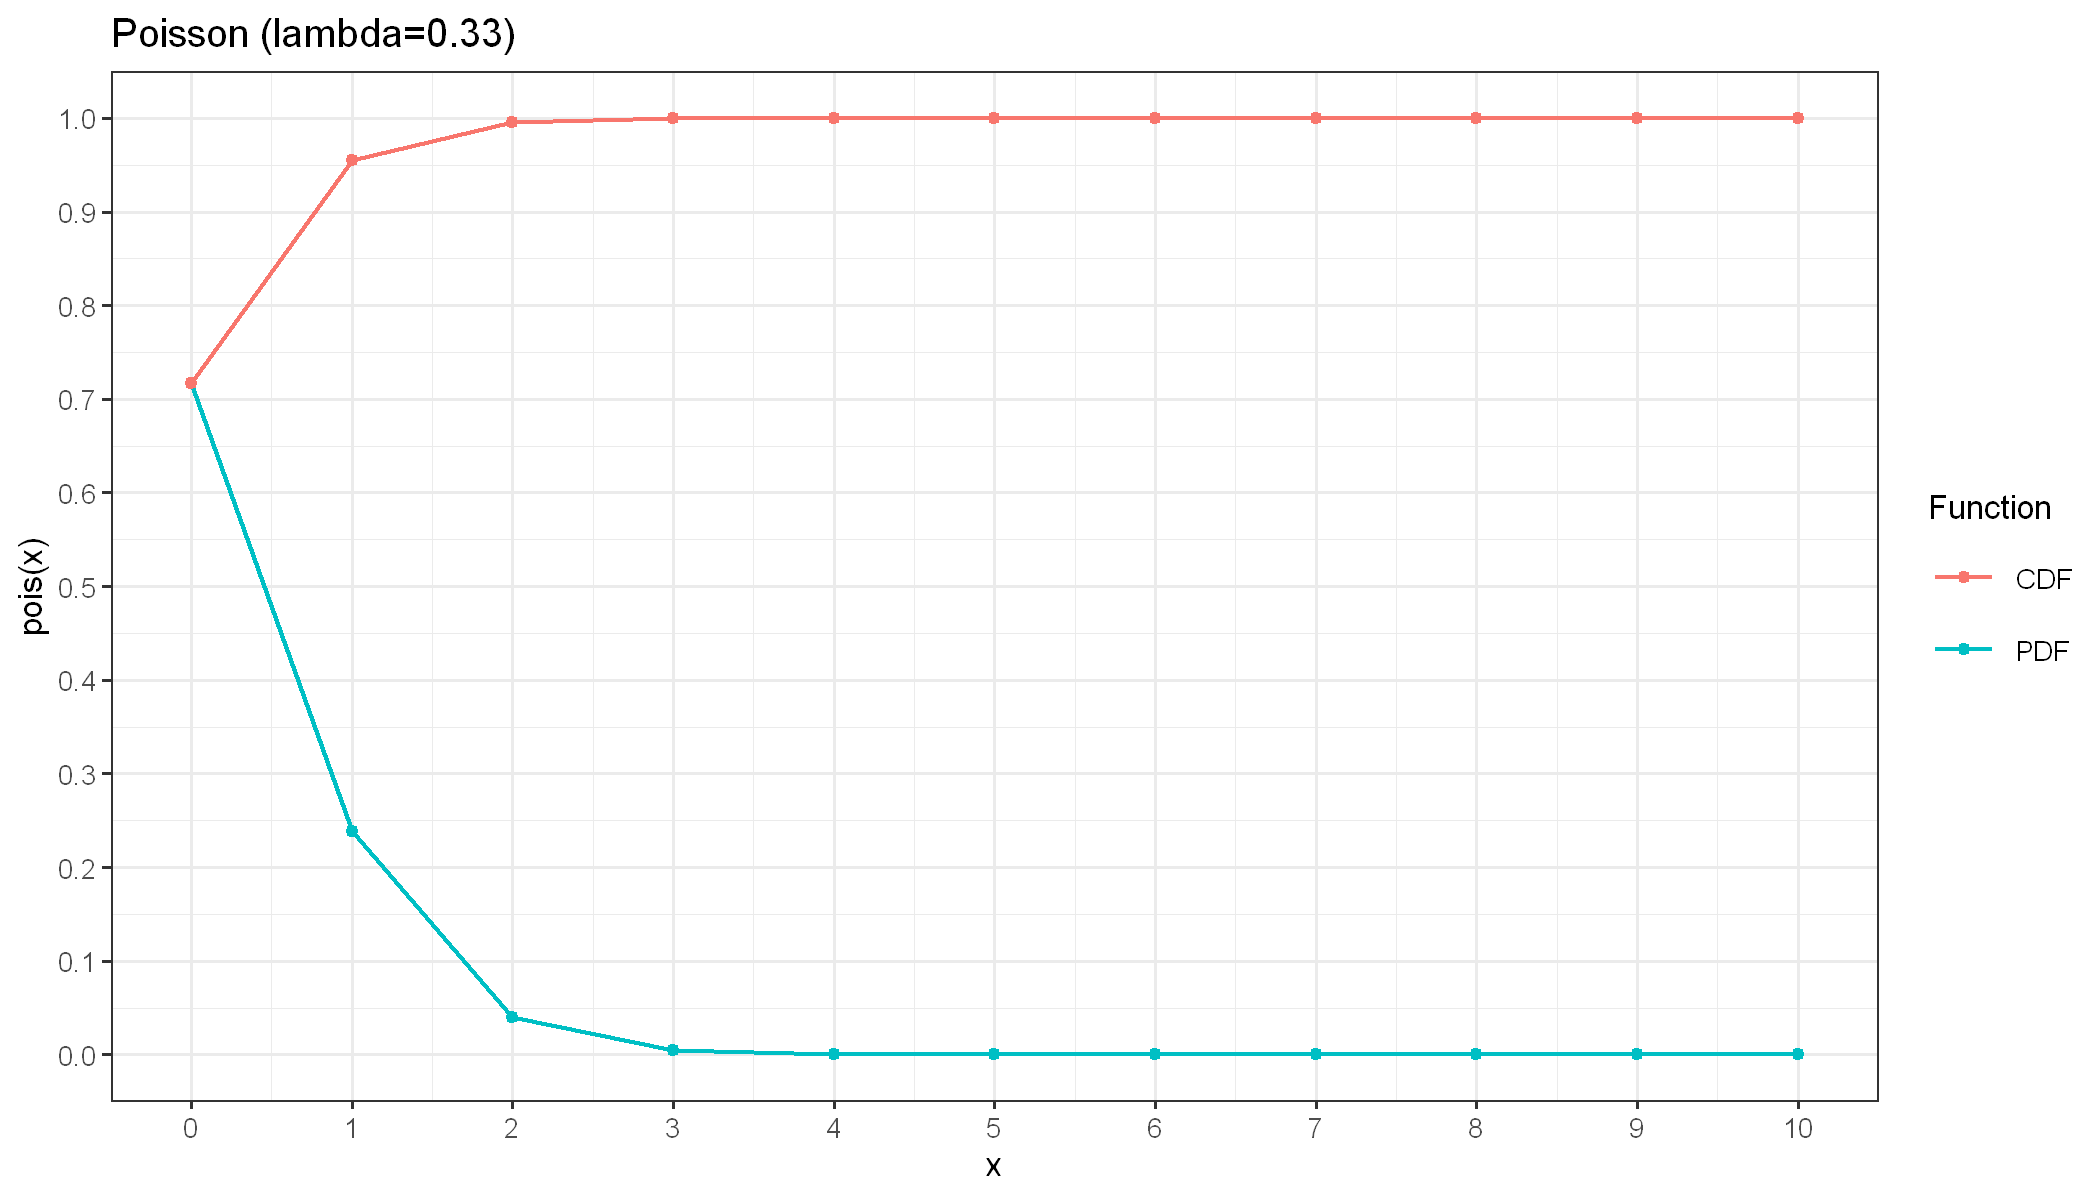

In [7]:
lambda <- 1/3 # rate

x <- 0:10
pois <- tibble(x, 'PDF'=dpois(x, lambda), 'CDF'=ppois(x, lambda)) %>%
            pivot_longer(!x, names_to='function', values_to='value')

ggplot(data=pois, aes(x=x, y=value, group=`function`, colour=`function`)) +
    geom_line(size=.5) +
    geom_point(size=1) +
    scale_x_continuous(n.breaks=11) +
    scale_y_continuous(n.breaks=11) +
    ylab('pois(x)') +
    labs(colour='Function') +
    ggtitle(paste('Poisson (lambda=', round(lambda, 2), ')', sep=''))

cat('Probability that there is at least one error on a specific page of the book:', round(100*(1-ppois(0, lambda)), 2), '%')

<a id='sec4'></a>
## **Exercise 4**

We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn.

- ### Calculate the probability that at least 10 draws are needed

In [8]:
cat('Probability that at least 10 draws are needed:', round(100*(1-pgeom(10-2, 4/52)), 2), '%')

Probability that at least 10 draws are needed: 48.66 %

<a id='sec5'></a>
## **Exercise 5**

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form

$$
f(t) =
\begin{cases}
    c(t-1)(2-t) & 1<t<2\\
    0           & \text{otherwise}
\end{cases}
$$

where $t$ is the time in hours.

<a id='sec5.A'></a>
### **5.A** Using the $\texttt{integrate()}$ R function, determine the constant $c$ (and verify it analytically)

In [9]:
c <- 1/(integrate(function(t) {(t-1)*(2-t)}, lower=1, upper=2)$value)
cat('c =', c)

c = 6

Analytically:

$$
1 = \int_{0}^{+\infty} f(t) \,dt =
    \int_{1}^{2} c(t-1)(2-t) \,dt =
    c \int_{1}^{2} (-t^2 +3t -2) \,dt =
    c \left[-\frac{t^3}{3} +3\frac{t^2}{2} -2t\right]_1^2 =
    \frac{c}{6}
\implies
c = 6
$$

<a id='sec5.B'></a>
### **5.B** Write the set of four R functions and plot the PDF and CDF, respectively

Let's determine the CDF analytically:

$$
F(t) = \int_{0}^{t} f(t') \,dt' =
    \int_{1}^{t<2} 6(t'-1)(2-t') \,dt' =
    6 \int_{1}^{t} (-t'^2 +3t' -2) \,dt' =
    6 \left[-\frac{t'^3}{3} +3\frac{t'^2}{2} -2t'\right]_1^t =
    -2t^3 +9t^2 -12t + 5
$$

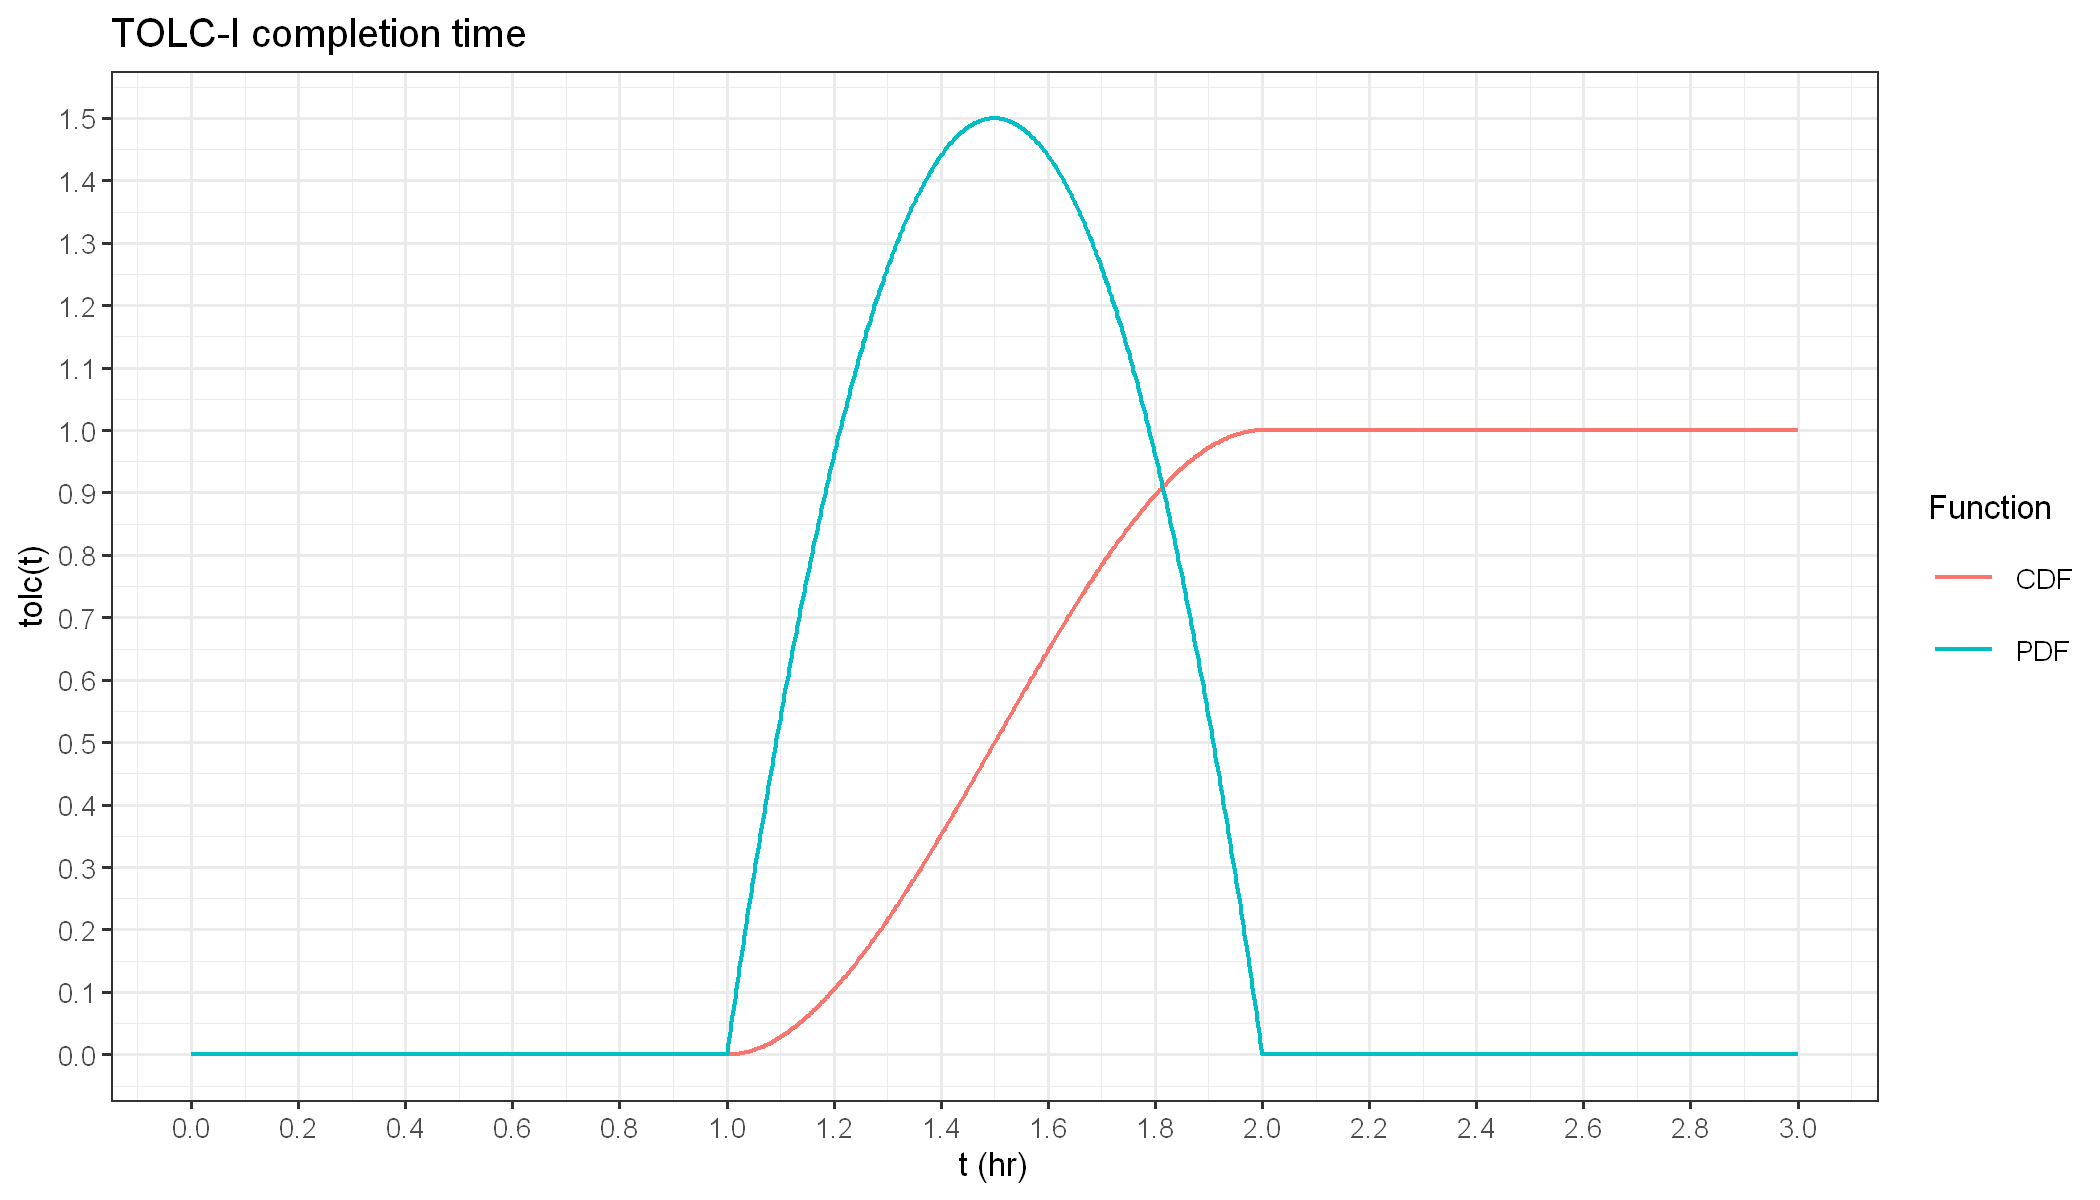

In [10]:
# PDF
dtolc <- function(t) {
            if (1<t & t<2) 6*(t-1)*(2-t)
            else 0
            }
dtolc <- Vectorize(dtolc)

# CDF
ptolc <- function(t) {
            if (t<=1) 0
            else if (1<t & t<2) -2*t^3 +9*t^2 -12*t +5
            else 1
            }
ptolc <- Vectorize(ptolc)

# quantile function
qtolc <- Vectorize(inverse(ptolc, lower=1, upper=2))

# sampling from the distribution
rtolc <- function(n) {qtolc(runif(n))}

t <- seq(0, 3, length=1000)
tolc <- tibble(t, 'PDF'=dtolc(t), 'CDF'=ptolc(t)) %>%
            pivot_longer(!t, names_to='function', values_to='value')

ggplot(data=tolc, aes(x=t, y=value, group=`function`, colour=`function`)) +
    geom_line(size=.5) +
    scale_x_continuous(n.breaks=16) +
    scale_y_continuous(n.breaks=16) +
    xlab('t (hr)') +
    ylab('tolc(t)') +
    labs(colour='Function') +
    ggtitle('TOLC-I completion time')

<a id='sec5.C'></a>
### **5.C** Evaluate the probability that the aptitude test will take:
- #### more than 75 minutes
- #### between 90 and 120 minutes

In [11]:
cat('Probability that the aptitude test will take:')
cat('\n- more than 75 minutes:      ', round(100*(1-ptolc(75/60)), 2), '%')
cat('\n- between 90 and 120 minutes:', round(100*(ptolc(120/60)-ptolc(90/60)), 2), '   %')

Probability that the aptitude test will take:
- more than 75 minutes:       84.38 %
- between 90 and 120 minutes: 50    %

<a id='sec6'></a>
## **Exercise 6**

The lifetime of tires sold by an used tires shop is $10^4$ $\cdot$ $x$ km, where $x$ is a random variable following the distribution function

$$
f(x) =
\begin{cases}
    2/x^2 & 1<x<2\\
    0     & \text{otherwise}
\end{cases}
$$

<a id='sec6.A'></a>
### **6.A** Write the set of four R functions and plot the PDF and CDF, respectively

Let's determine the CDF analytically:

$$
F(x) = \int_{0}^{x} f(x') \,dx' =
       \int_{1}^{x<2} \frac{2}{x'^2} \,dx' =
       2 \left[-\frac{1}{x'}\right]_1^x =
       2-\frac{2}{x}
$$

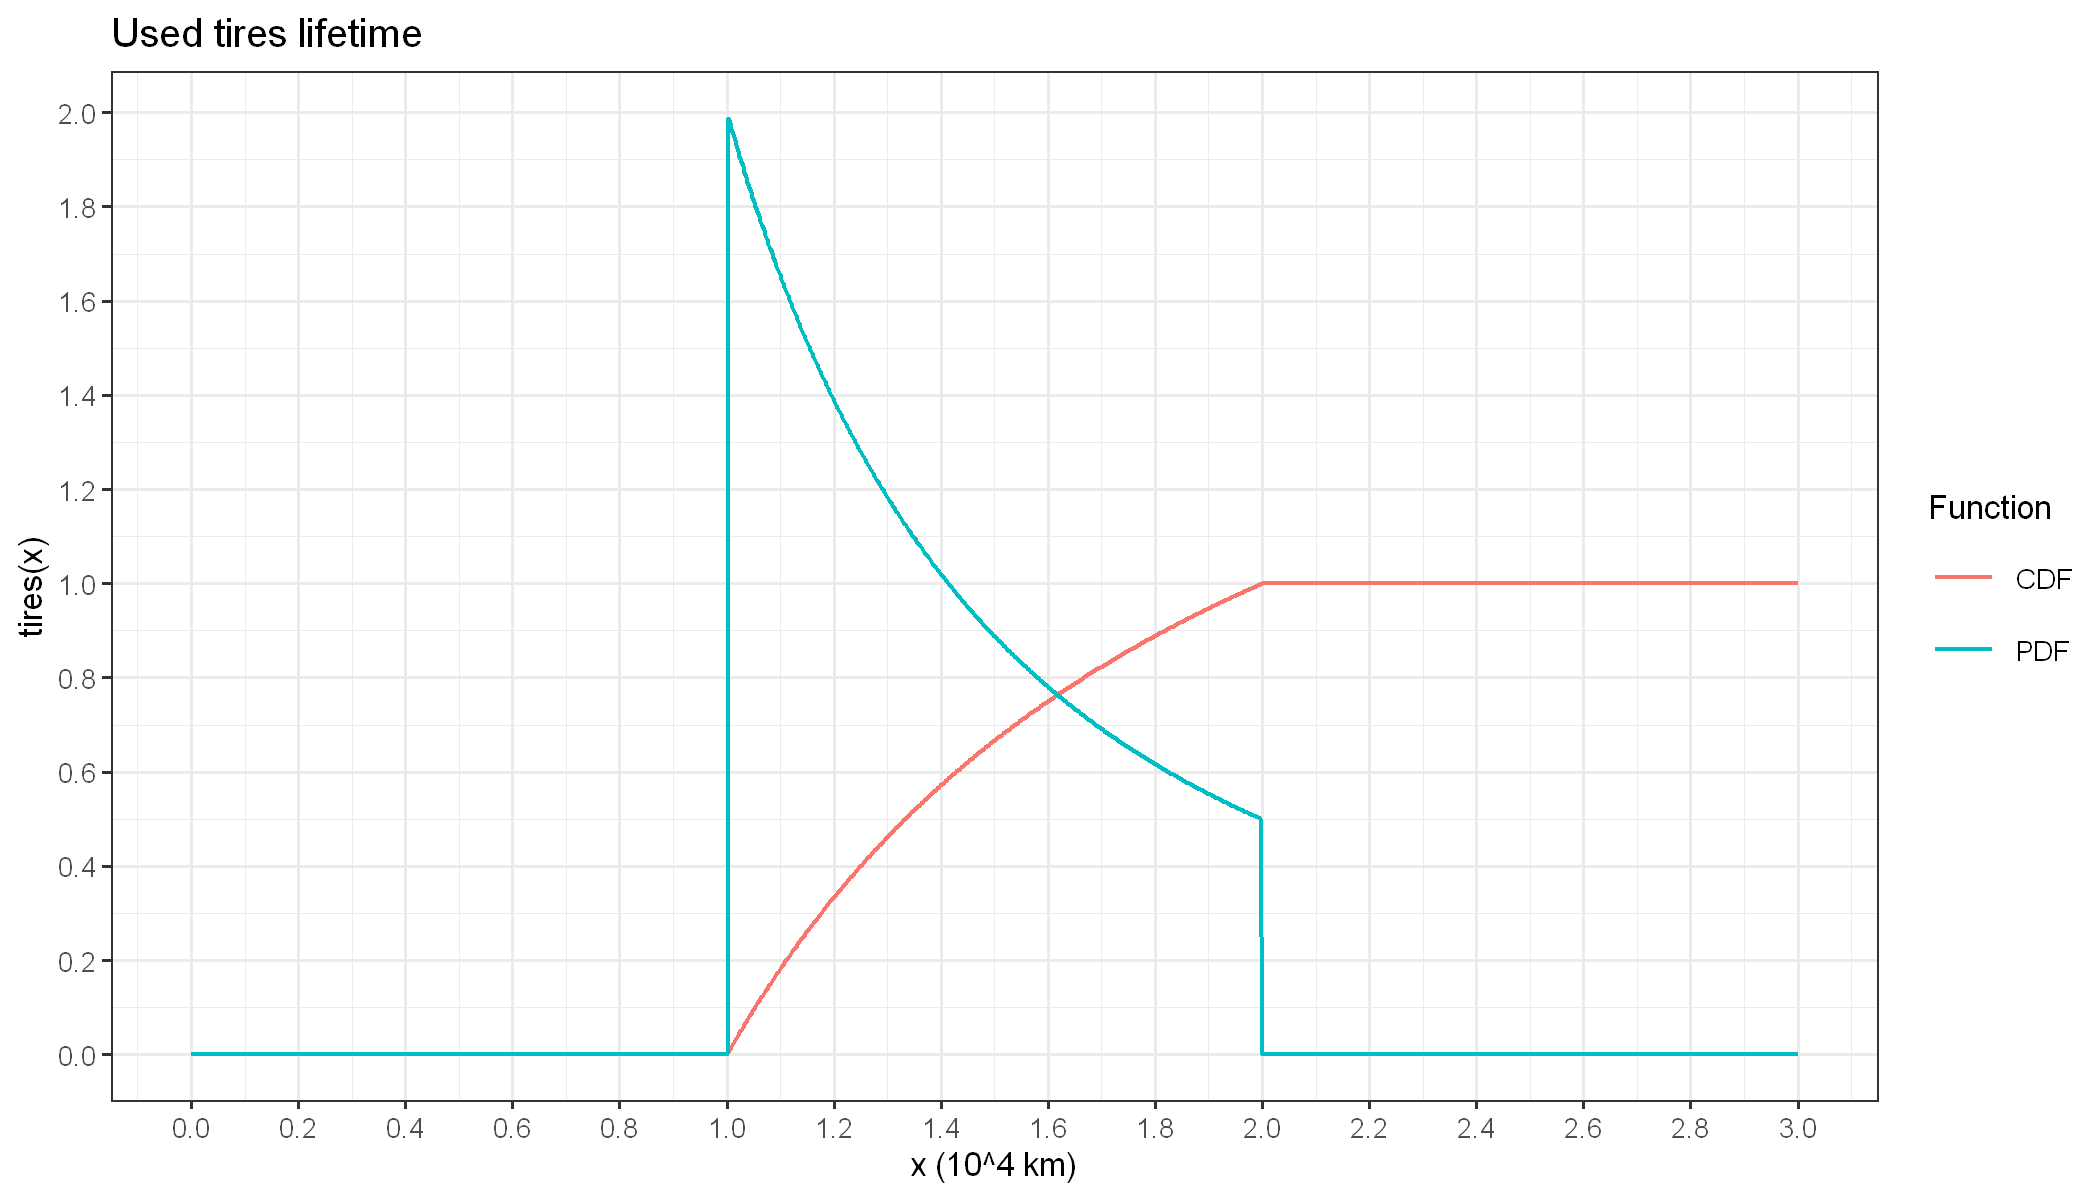

In [12]:
# PDF
dtires <- function(x) {
            if (1<x & x<2) 2/(x^2)
            else 0
            }
dtires <- Vectorize(dtires)

# CDF
ptires <- function(x) {
            if (x<=1) 0
            else if (1<x & x<2) 2-(2/x)
            else 1
            }
ptires <- Vectorize(ptires)

# quantile function
qtires <- Vectorize(inverse(ptires, lower=1, upper=2))

# sampling from the distribution
rtires <- function(n) {qtires(runif(n))}

x <- seq(0, 3, length=1000)
tires <- tibble(x, 'PDF'=dtires(x), 'CDF'=ptires(x)) %>%
            pivot_longer(!x, names_to='function', values_to='value')

ggplot(data=tires, aes(x=x, y=value, group=`function`, colour=`function`)) +
    geom_line(size=.5) +
    scale_x_continuous(n.breaks=16) +
    scale_y_continuous(n.breaks=11) +
    xlab('x (10^4 km)') +
    ylab('tires(x)') +
    labs(colour='Function') +
    ggtitle('Used tires lifetime')

<a id='sec6.B'></a>
### **6.B** Determine the probability that tires will last less than 15000 km

In [13]:
cat('Probability that tires will last less than 15000 km:', round(100*ptires(15000/(10^4)), 2), '%')

Probability that tires will last less than 15000 km: 66.67 %

<a id='sec6.C'></a>
### **6.C** Sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression $Var(x) = E[x^2] - E[x]^2$

In [14]:
x <- rtires(3000)

cat('Mean value:', round((10^4)*mean(x), 1), 'km')
cat('\nVariance:    ', round((10^4)*(mean(x^2)-(mean(x))^2), 1), 'km')

Mean value: 13914.2 km
Variance:     812.1 km